# Кейс №5. CUPED

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import logging
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from auto_ab.stratification.params import SplitBuilderParams
from auto_ab.prepilot.params import PrepilotParams
from auto_ab.prepilot.prepilot_experiment_builder import PrepilotExperimentBuilder
from auto_ab.prepilot.prepilot_split_builder import PrepilotSplitBuilder
from auto_ab.auto_ab.abtest import ABTest
from auto_ab.auto_ab.params import ABTestParams

%load_ext autoreload
%autoreload 2

# Кейс 5.1. Различий между групп нет

In [3]:
df = pd.read_csv('ab_data.csv')

In [4]:
ab_params = ABTestParams()
ab_test = ABTest(df, ab_params)

In [5]:
print('Control mean = {:.3f}'.format(np.mean(ab_test.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.000
Control var = 24.972
Treatment var = 24.900


In [6]:
print(f"bootstrap_test: {ab_test.test_hypothesis_boot_confint()}")
print(f"mannwhitney_test: {ab_test.test_hypothesis_mannwhitney()}")
print(f"ttest_test: {ab_test.test_hypothesis_ttest()}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 288.38it/s]


bootstrap_test: {'stat': None, 'p-value': None, 'result': 0}
mannwhitney_test: {'stat': 4992976857.0, 'p-value': 0.5890975776571467, 'result': 0}
ttest_test: {'stat': -0.4435517988023507, 'p-value': 0.6573671411499618, 'result': 0}


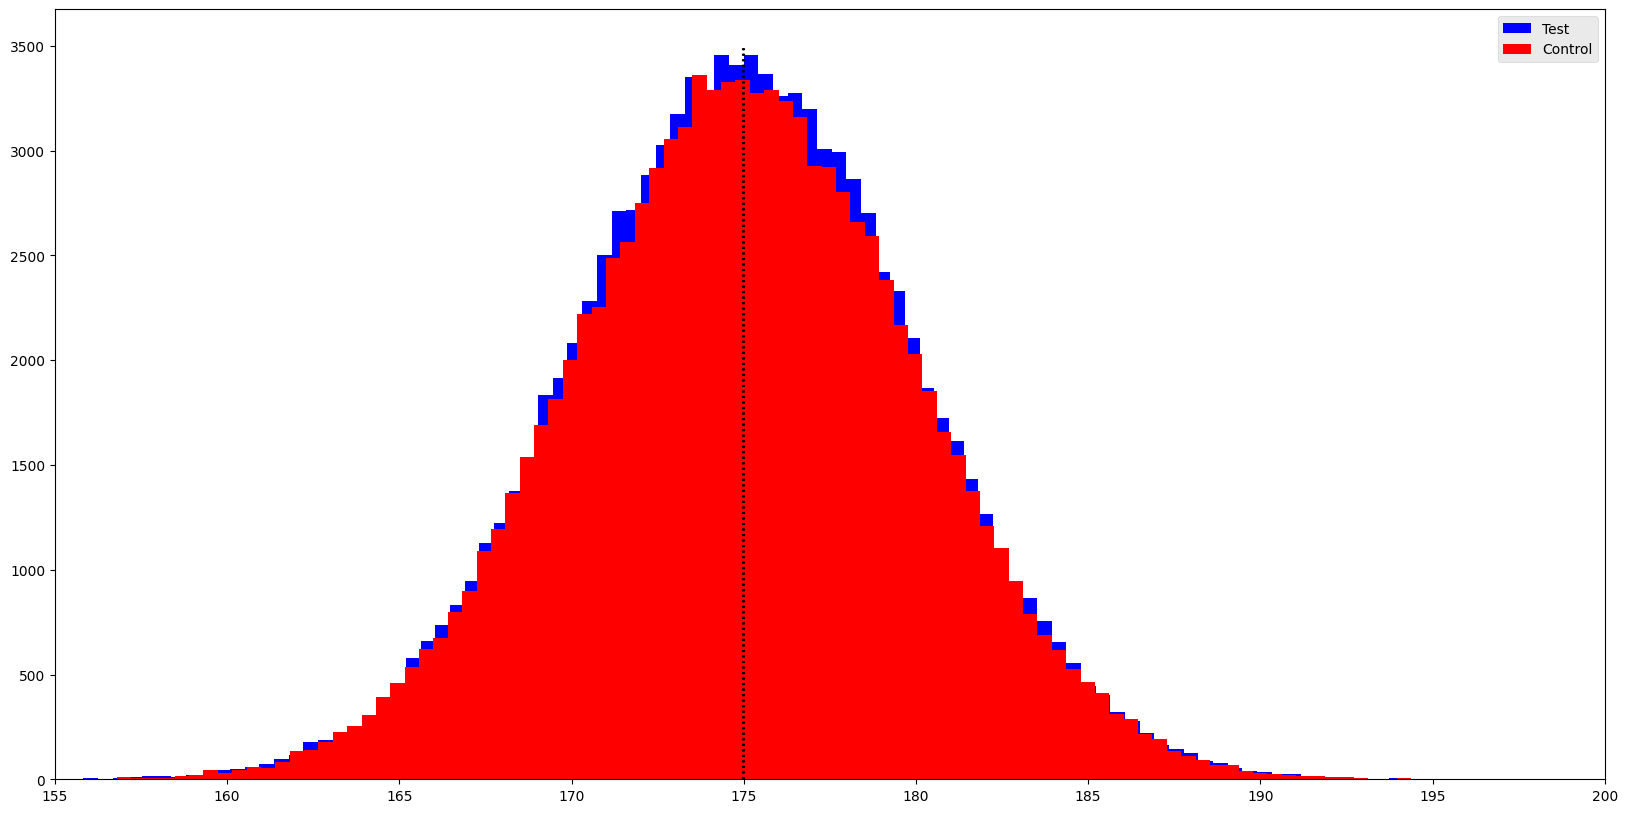

In [7]:
plt.figure(figsize=(20,10))
plt.hist(ab_test.params.data_params.treatment, bins=100, label='Test', color="blue")
plt.hist(ab_test.params.data_params.control, bins=100, label='Control', color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.vlines([np.mean(ab_test.params.data_params.treatment), np.mean(ab_test.params.data_params.control)],
           ymin=0, ymax=3500, color='black', linestyles='dotted')
plt.xlim([155, 200])
plt.show()
plt.close()

### Применяем CUPED для данных без различий

In [4]:
df = pd.read_csv('ab_data.csv')

In [7]:
ab_test1 = ab_test.cuped()

In [8]:
print('Control mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test1.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test1.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.000
Control var = 3.417
Treatment var = 3.428


In [ ]:
print(f"bootstrap_test: {ab_test1.test_hypothesis_boot_confint()}")
print(f"mannwhitney_test: {ab_test1.test_hypothesis_mannwhitney()}")
print(f"ttest_test: {ab_test1.test_hypothesis_ttest()}")

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(ab_test1.params.data_params.treatment, bins=100, label='Test', color="blue")
plt.hist(ab_test1.params.data_params.control, bins=100, label='Control', color="red")

plt.style.use('ggplot')
plt.ylabel('Частота значения')
plt.legend(loc='upper right')
plt.vlines([np.mean(ab_test1.params.data_params.treatment), np.mean(ab_test1.params.data_params.control)],
           ymin=0, ymax=3500, color='black', linestyles='dotted')
plt.xlim([155, 200])
plt.show()
plt.close()

# Кейс 5.2. Различия между группами есть

### Увеличиваем значения одной из групп

In [ ]:
df = pd.read_csv('ab_data.csv')

incs = np.sort(np.random.uniform(0.0, 0.016, df.shape[0]))
df[ab_test.params.data_params.target].where(df[ab_test.params.data_params.group_col]=='A',
                                    df[ab_test.params.data_params.target] + incs, 
                                    axis=0,
                                    inplace=True)

ab_test = ABTest(df, ab_params)

In [ ]:
print('Control mean = {:.3f}'.format(np.mean(ab_test.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test.params.data_params.treatment)))

In [ ]:
print(f"bootstrap_test: {ab_test.test_hypothesis_boot_confint()}")
print(f"mannwhitney_test: {ab_test.test_hypothesis_mannwhitney()}")
print(f"ttest_test: {ab_test.test_hypothesis_ttest()}")

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(ab_test.params.data_params.treatment, bins=100, label='Test', color="blue")
plt.hist(ab_test.params.data_params.control, bins=100, label='Control', color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.vlines([np.mean(ab_test.params.data_params.treatment), np.mean(ab_test.params.data_params.control)],
           ymin=0, ymax=3500, color='black', linestyles='dotted')
plt.xlim([155, 200])
plt.show()
plt.close()

### Применяем CUPED для данных с различиями

In [ ]:
ab_test2 = ab_test.cuped()

In [ ]:
print('Control mean = {:.3f}'.format(np.mean(ab_test2.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test2.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test2.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test2.params.data_params.treatment)))

In [ ]:
print(f"bootstrap_test: {ab_test2.test_hypothesis_boot_confint()}")
print(f"mannwhitney_test: {ab_test2.test_hypothesis_mannwhitney()}")
print(f"ttest_test: {ab_test2.test_hypothesis_ttest()}")

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(ab_test2.params.data_params.treatment, bins=100, label='Test', color="blue")
plt.hist(ab_test2.params.data_params.control, bins=100, label='Control', color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.vlines([np.mean(ab_test2.params.data_params.treatment), np.mean(ab_test2.params.data_params.control)],
           ymin=0, ymax=3500, color='black', linestyles='dotted')
plt.xlim([155, 200])
plt.show()
plt.close()